In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Dropping Irrelevant Feature
RowNumber, CustomerId and Surname are irrelevant, so we drop those features.

In [9]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

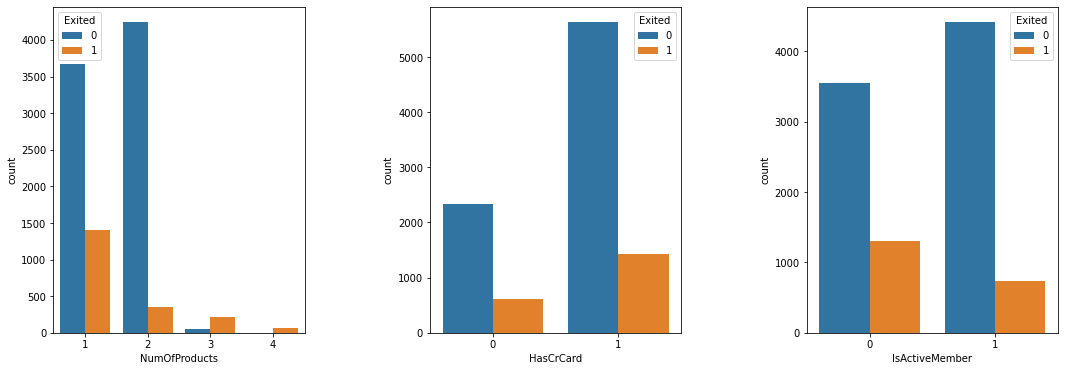

In [10]:
_,ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.5)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax = ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

Customer with 3 or 4 products are higher chances to Churn



In [11]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale 
df= pd.get_dummies(df, drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

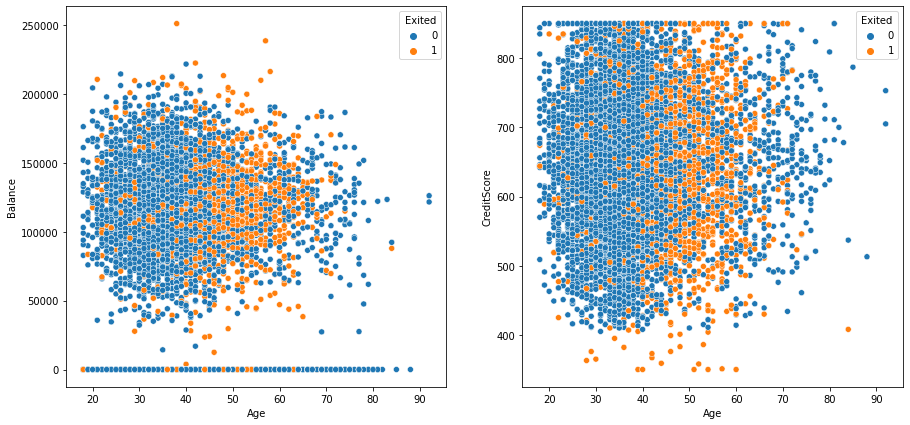

In [13]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

1) 40 to 70 years old customers are higher chances to churn
2) Customer with CreditScore less then 400 are higher chances to churn

In [14]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

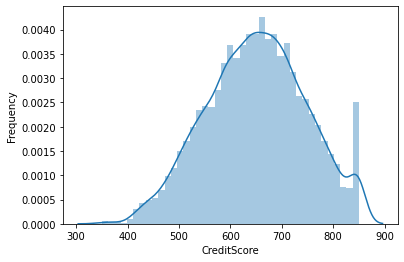

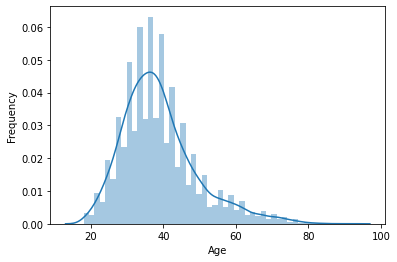

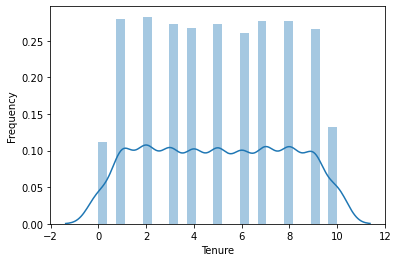

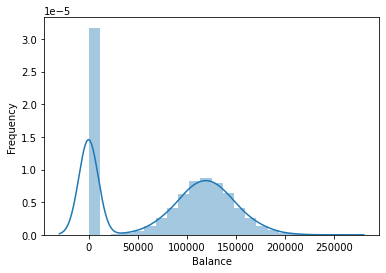

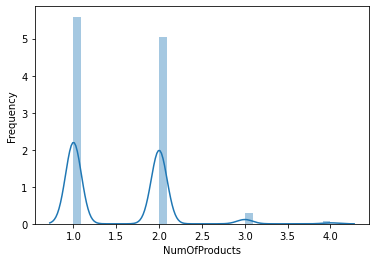

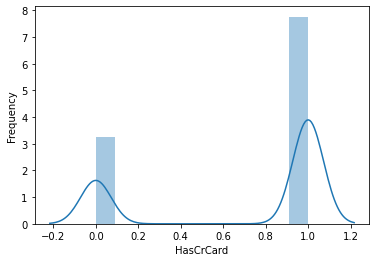

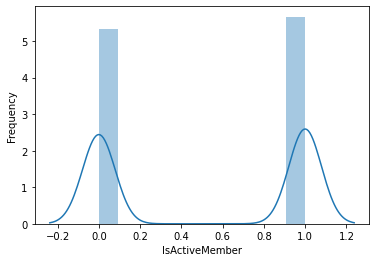

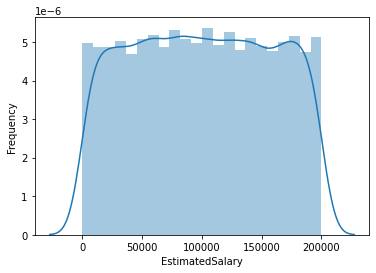

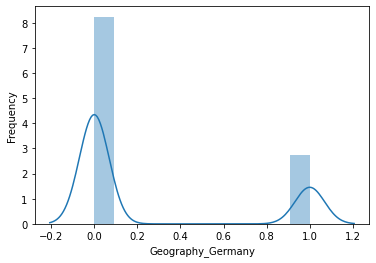

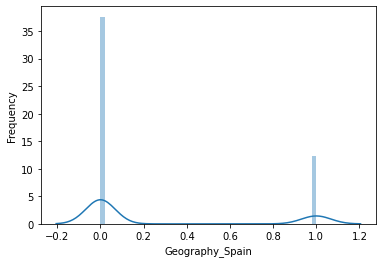

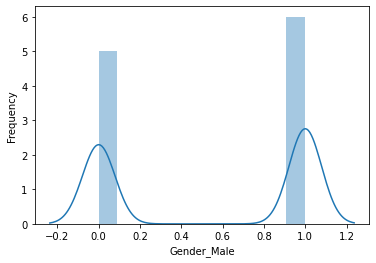

In [15]:
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.ylabel("Frequency")
    plt.show()

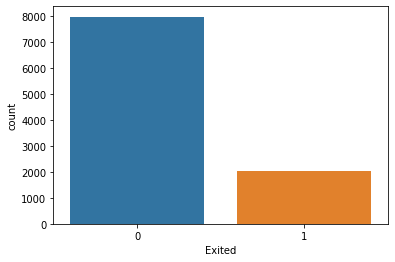

In [16]:
# target count
plt.figure()
sns.countplot(y)
plt.show()

#### As we seen here the data is highly imbalance so we have balance the data

<AxesSubplot:>

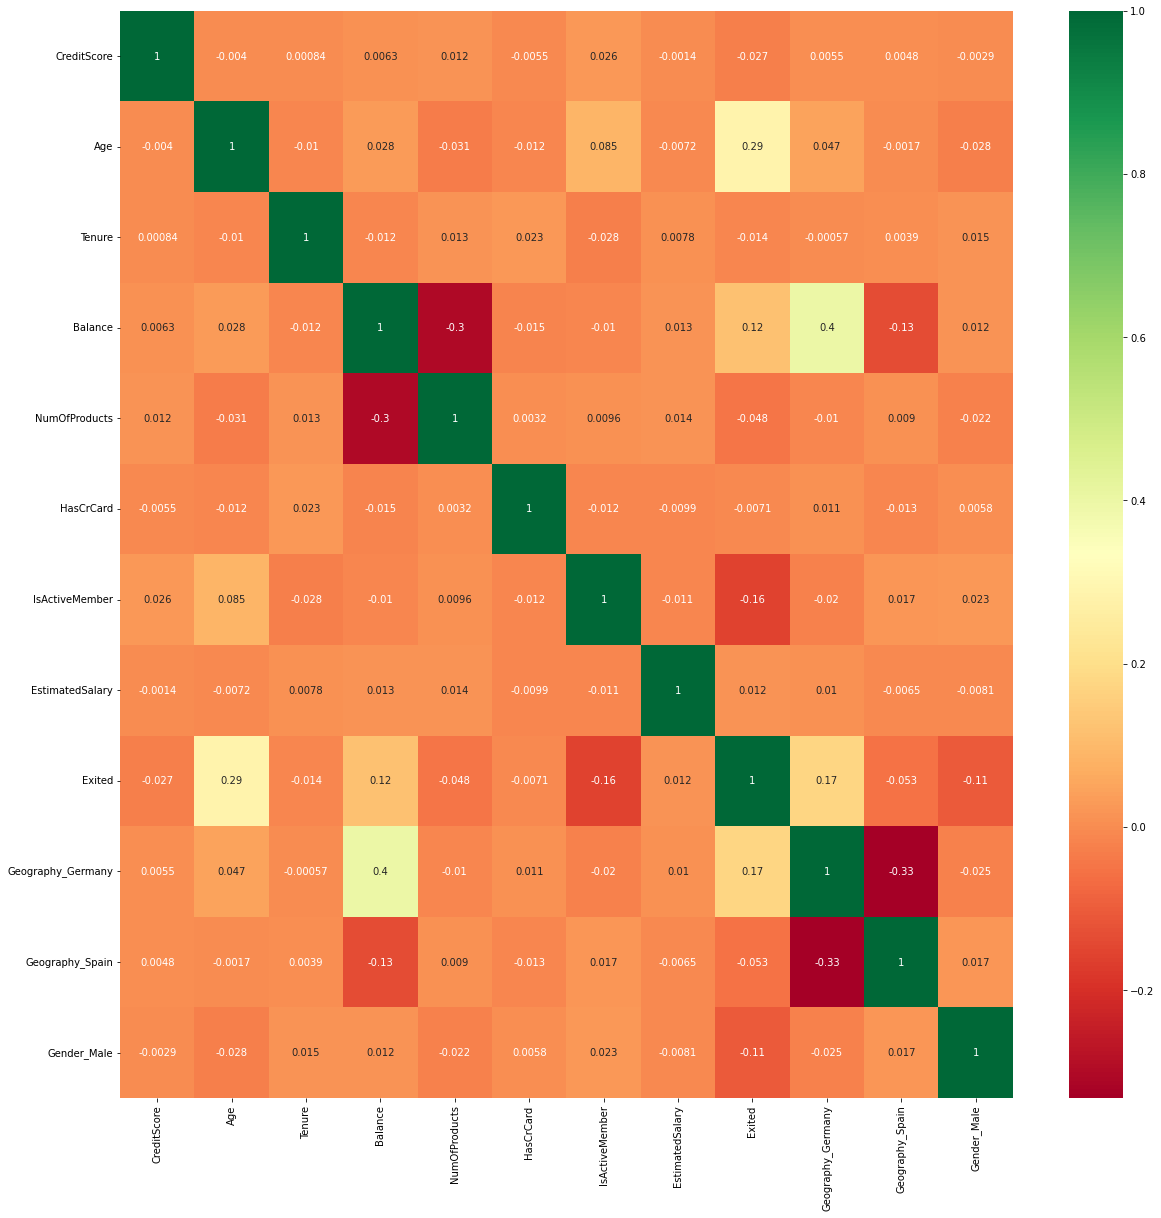

In [17]:
# Plotting The Correlations between all the features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [18]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes

In [20]:
model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [21]:
# predict on testing

y_pred = model.predict(X_test)

In [22]:
print("accuracy", accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))
print("recall", recall_score(y_test,y_pred))
print("f1", f1_score(y_test,y_pred))

accuracy 0.8243333333333334
precision 0.6592356687898089
recall 0.33014354066985646
f1 0.43995749202975554


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      2373
           1       0.66      0.33      0.44       627

    accuracy                           0.82      3000
   macro avg       0.75      0.64      0.67      3000
weighted avg       0.81      0.82      0.80      3000



In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[2266  107]
 [ 420  207]]
0.8243333333333334


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2106  267]
 [ 344  283]]
0.7963333333333333


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2373
           1       0.51      0.45      0.48       627

    accuracy                           0.80      3000
   macro avg       0.69      0.67      0.68      3000
weighted avg       0.79      0.80      0.79      3000



## Choosing the K value

In [32]:
error_rate = []

# Will take some time
for i in range(1,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

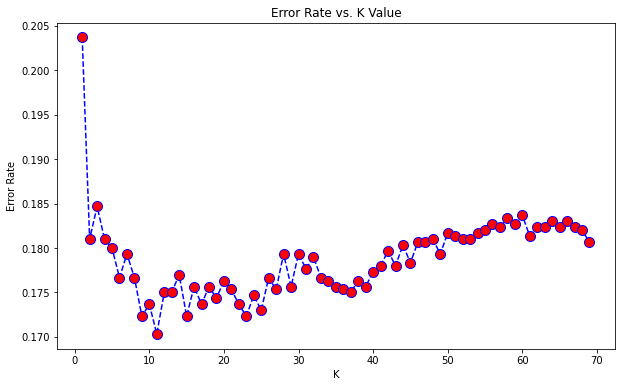

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=23


[[2312   61]
 [ 456  171]]


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2373
           1       0.74      0.27      0.40       627

    accuracy                           0.83      3000
   macro avg       0.79      0.62      0.65      3000
weighted avg       0.81      0.83      0.79      3000

0.8276666666666667


In [36]:
# oversampling 
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [38]:
y_train_sm.value_counts()

0    5590
1    5590
Name: Exited, dtype: int64

# Logistics Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# model

lr = LogisticRegression(random_state=1)
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(random_state=1)

In [41]:
# train score

lr.score(X_train_sm, y_train_sm)

0.7070661896243292

In [42]:
# prediction on test

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      2373
           1       0.66      0.33      0.44       627

    accuracy                           0.82      3000
   macro avg       0.75      0.64      0.67      3000
weighted avg       0.81      0.82      0.80      3000



# Desicion Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# model
# gini index
model = DecisionTreeClassifier()
model.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

In [45]:
# train score
model.score(X_train,y_train)

1.0

In [46]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2373
           1       0.46      0.57      0.51       627

    accuracy                           0.77      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.79      0.77      0.78      3000



In [47]:
model.get_depth()

31

In [48]:
# desicion tree using prunning

model2 = DecisionTreeClassifier(max_depth=8,min_samples_leaf=3)
model2.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3)

In [49]:
# train score
model2.score(X_train,y_train)

0.8194285714285714

In [50]:
y_pred = model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2373
           1       0.53      0.71      0.60       627

    accuracy                           0.81      3000
   macro avg       0.72      0.77      0.74      3000
weighted avg       0.83      0.81      0.82      3000



# Random Forest

In [51]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [53]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2373
           1       0.64      0.59      0.61       627

    accuracy                           0.84      3000
   macro avg       0.76      0.75      0.76      3000
weighted avg       0.84      0.84      0.84      3000

